## Exploratory Data Analysis

### 1. Analysis
1. Univariate Analysis
2. Multivariate Analysis

### 2. Feature Engineering
1. Creating new columns
2. Modifying existing ones

### 3. Handling Outliers
1. Detect Outliers
2. Remove Outliers

## The entire process is highly iterative

In [288]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
# Importing the dataset
import pandas as pd
df=pd.read_excel("t.xlsx")

In [291]:
# Shape
df.shape

(891, 12)

In [292]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [293]:
# Listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Categorical Columns

- Survived
- PClass
- Sex
- SibSp
- Parch
- Embarked

## Numerical Columns

- Age 
- Fare
- PassengerId

## Mixed Columns

- Name
- Ticket
- Cabin

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [295]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [296]:
# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [297]:
# Dropping cabin column

df.drop(columns=['Cabin'], inplace=True)


In [298]:
# Imputing missing values for age
# Strategy - mean
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [299]:
# Imputing missing values for embarked

# finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])



In [300]:
# Want to check one more thing...

# Should I change the SibSp and Parch to categories

df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [301]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Changing data type for the following cols

- Survived(category)
- PClass(category)
- Sex(category)
- Age(int)
- Embarked(category)

In [302]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [304]:
# Five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 62 people died in the accident


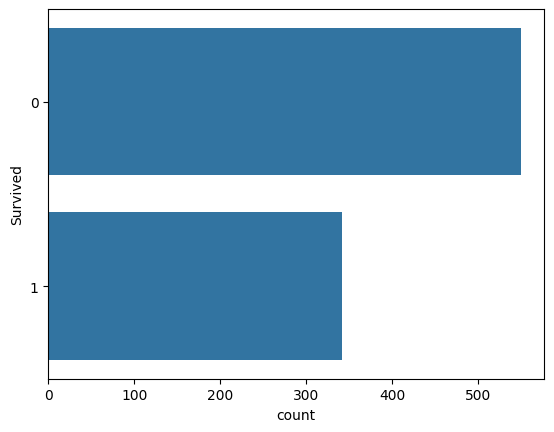

In [305]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(df['Survived'])

death_percent=round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Pclass'>

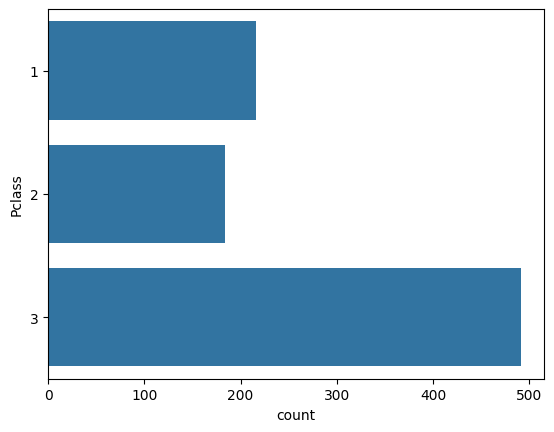

In [306]:
# Pclass column

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(df['Pclass'])

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Sex'>

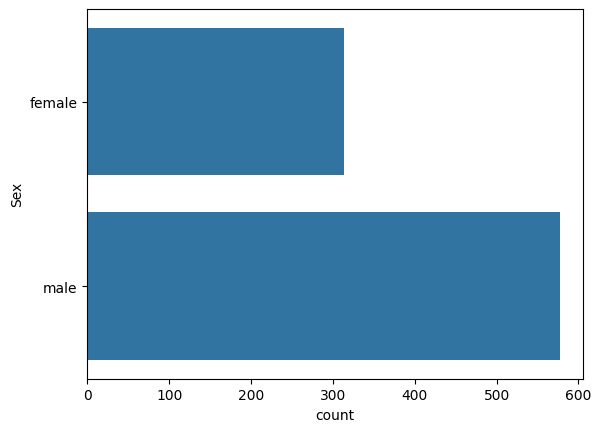

In [307]:
print((df['Sex'].value_counts()/891)*100)

sns.countplot(df['Sex'])

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: ylabel='count'>

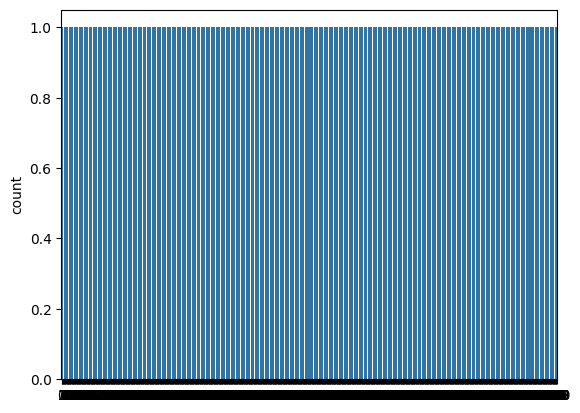

In [308]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: ylabel='count'>

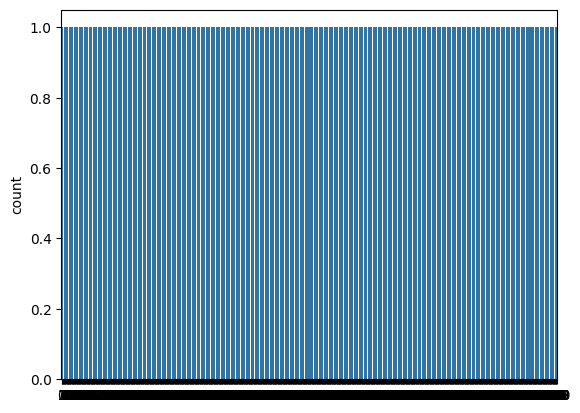

In [309]:
print((df['Parch'].value_counts()/891)*100)

sns.countplot(df['Parch'])

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='count', ylabel='Embarked'>

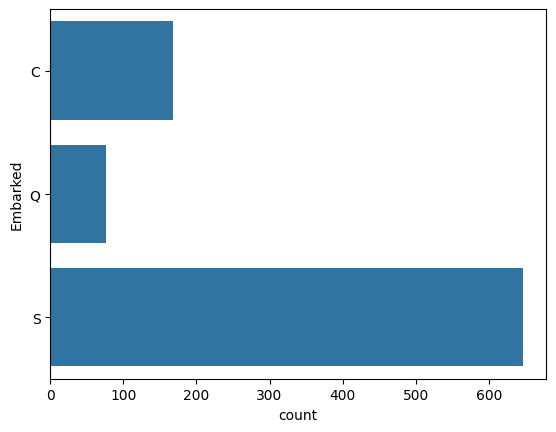

In [310]:
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(df['Embarked'])

0.45956263424701577
0.9865867453652877


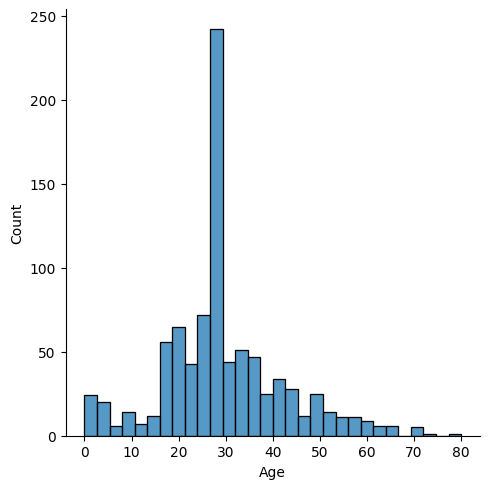

In [311]:
# Age column

sns.displot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

<Axes: ylabel='Age'>

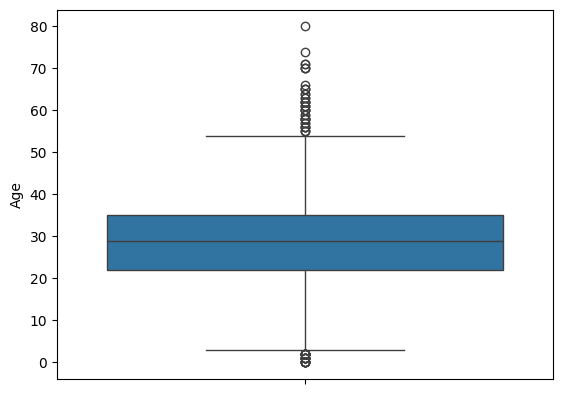

In [312]:
sns.boxplot(df['Age'])

In [313]:
# Just out of curiosity

print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


## Conclusion

- For all practical purposes age can be cosidered as normal distribution
- Deeper analysis is required for outlier detection

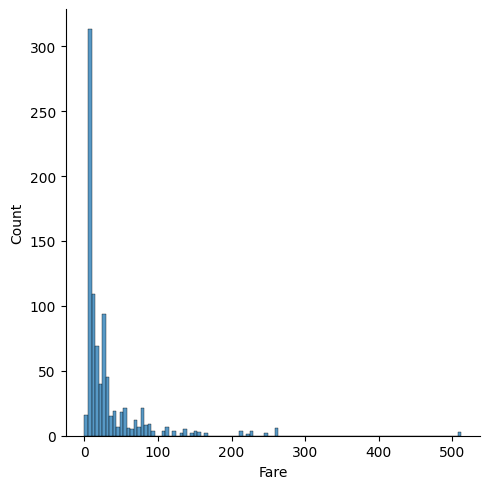

In [314]:
# Fare column

sns.displot(df['Fare'])

In [315]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


<Axes: ylabel='Fare'>

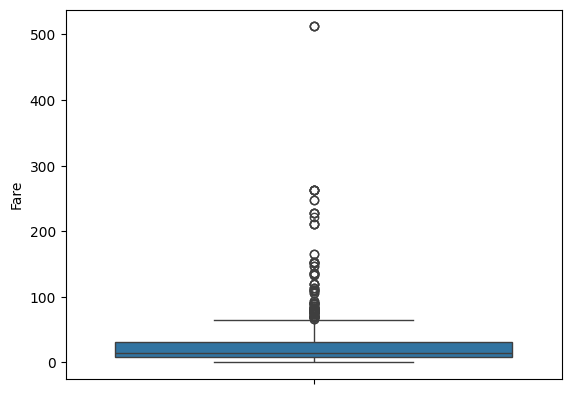

In [316]:
sns.boxplot(df['Fare'])

In [317]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


## Conclusion

- Highly skewed data, a lot of people had cheaper tickets
- Outliers are there in the data

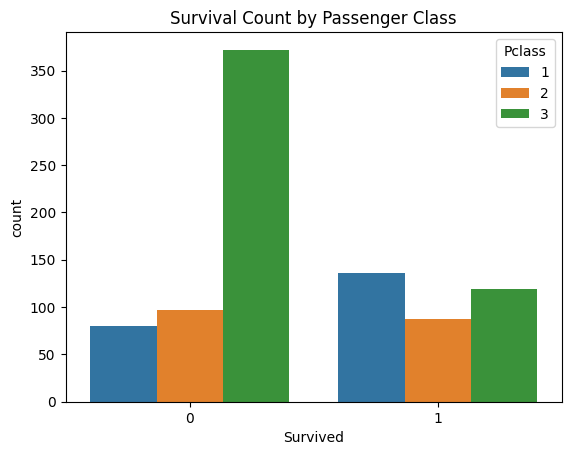

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


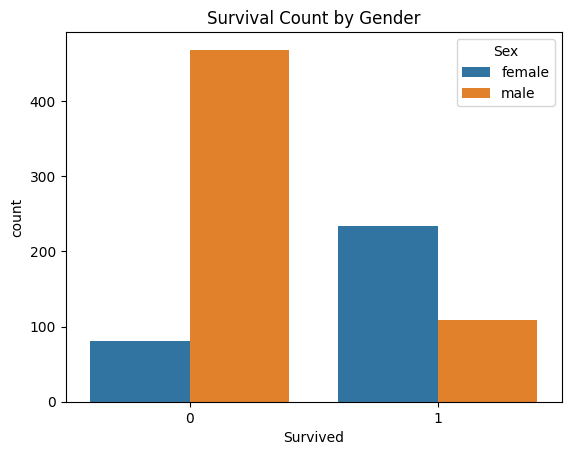

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()


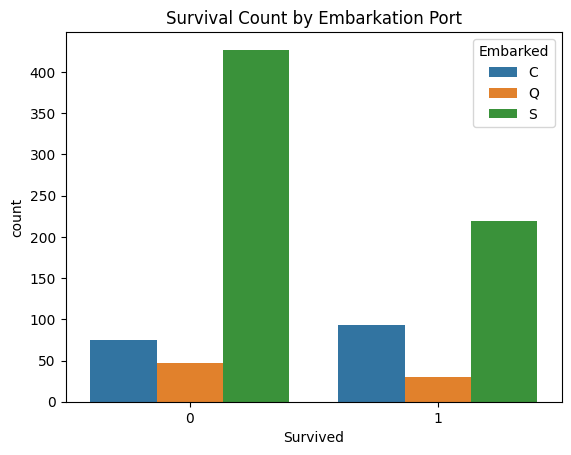

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by embarkation port
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Count by Embarkation Port')
plt.show()


<Figure size 1500x600 with 0 Axes>

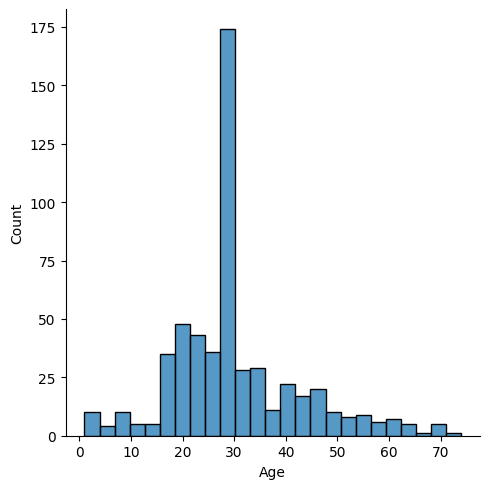

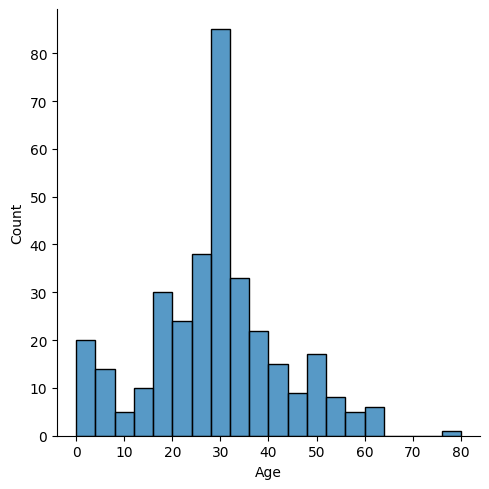

In [321]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Age'])
sns.displot(df[df['Survived']==1]['Age'])

<Figure size 1500x600 with 0 Axes>

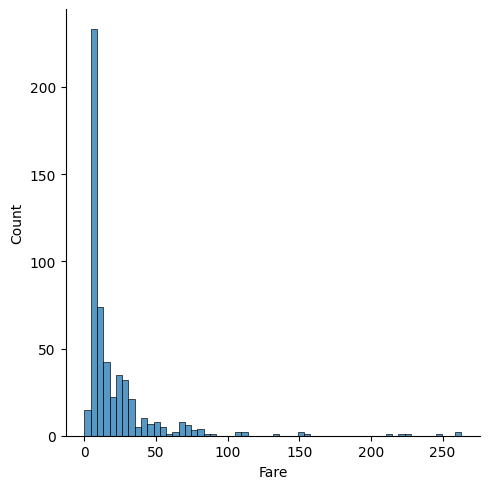

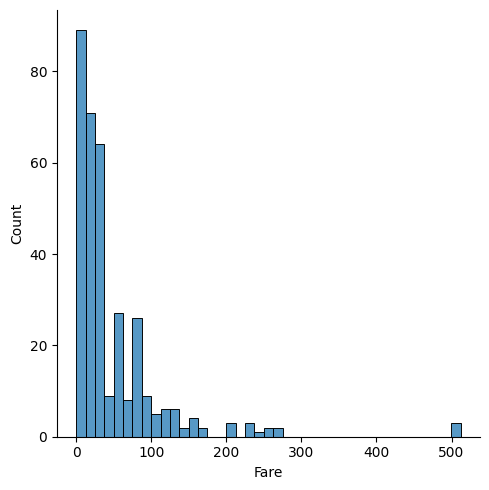

In [322]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Fare'])
sns.displot(df[df['Survived']==1]['Fare'])

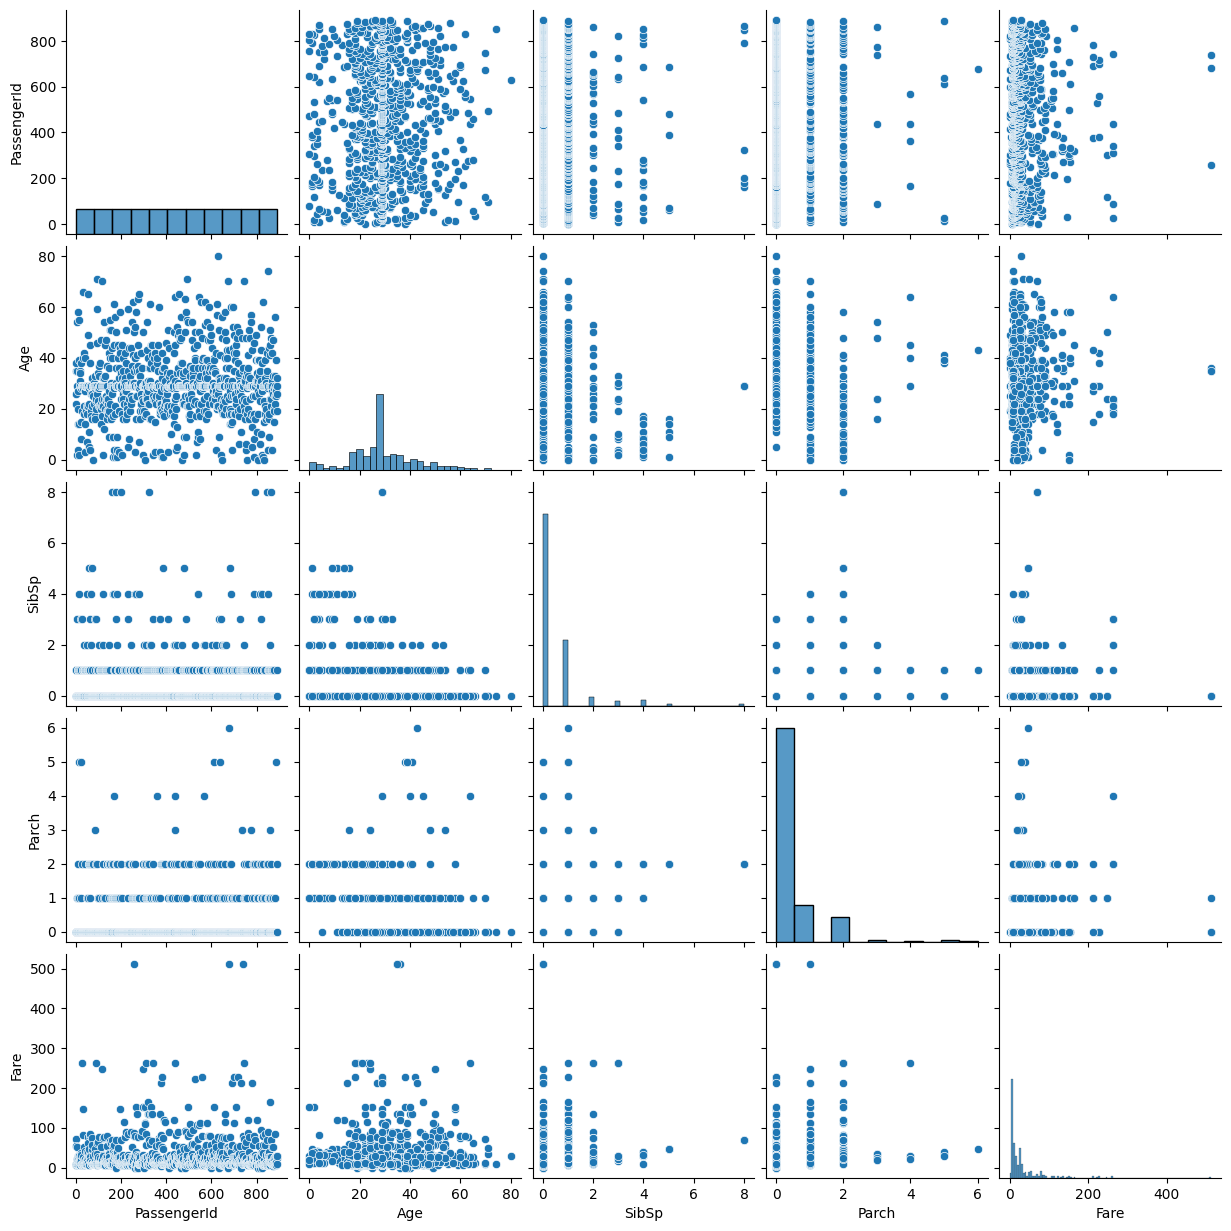

In [323]:
sns.pairplot(df)

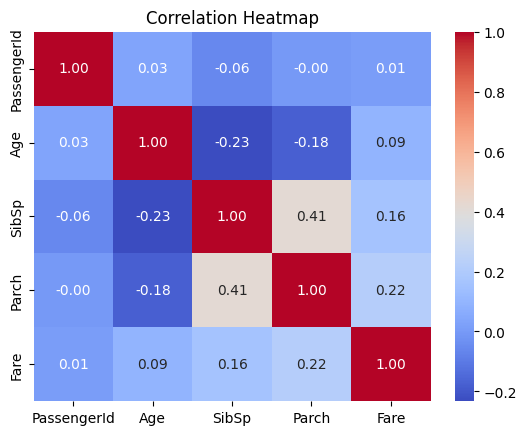

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [325]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [326]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
93,94,0,3,"Dean, Mr. Bertram Frank",male,26,1,2,C.A. 2315,20.5750,S,3
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0000,S,0
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40,0,0,PC 17582,153.4625,S,0
554,555,1,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.7750,S,0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8,3,1,349909,21.0750,S,4


In [327]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [328]:
df['family_type']=df['family_size'].apply(family_type)

In [329]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
771,772,0,3,"Jensen, Mr. Niels Peder",male,48,0,0,350047,7.8542,S,0,Alone
762,763,1,3,"Barah, Mr. Hanna Assi",male,20,0,0,2663,7.2292,C,0,Alone
346,347,1,2,"Smith, Miss. Marion Elsie",female,40,0,0,31418,13.0000,S,0,Alone
883,884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5000,S,0,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,Medium


In [330]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [331]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
297,298,0,1,"Allison, Miss. Helen Loraine",female,2,113781,151.5500,S,Medium
668,669,0,3,"Cook, Mr. Jacob",male,43,A/5 3536,8.0500,S,Alone
222,223,0,3,"Green, Mr. George Henry",male,51,21440,8.0500,S,Alone
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39,110413,79.6500,S,Medium
552,553,0,3,"O'Brien, Mr. Timothy",male,29,330979,7.8292,Q,Alone


In [332]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


## Detecting outliers

### Numerical Data
- if the data is following normal distribution, anything beyond   3*SD - mean + 3*SD can be considered as an outlier
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR

### Categorical data
- If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [333]:
# handling outliers in age(Almost normal)

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [334]:
# handling outliers from Fare column

# Finding quartiles

Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [335]:
# One hot encoding

df.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [336]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

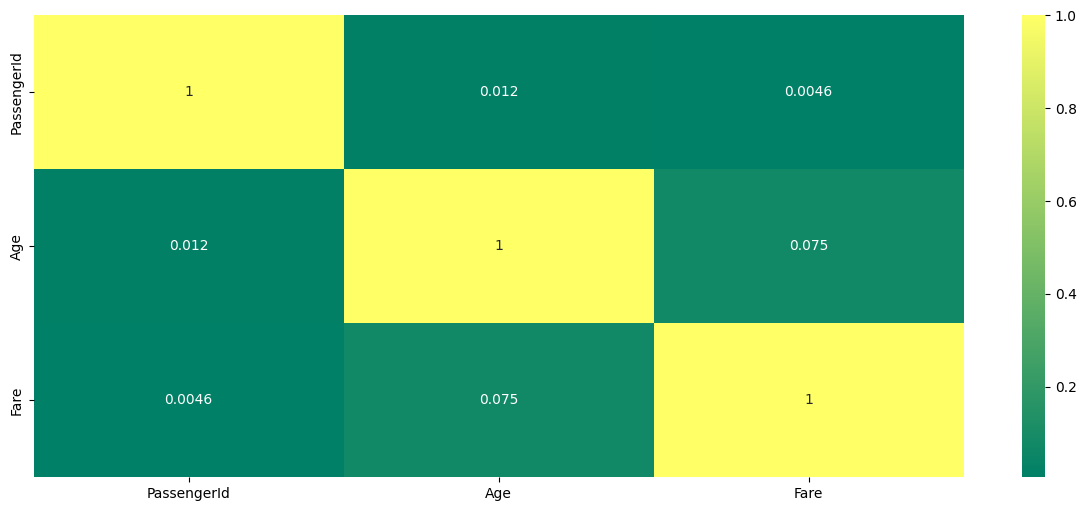

In [337]:
plt.figure(figsize=(15,6))

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Generating the heatmap
sns.heatmap(numeric_df.corr(), cmap='summer', annot=True)
plt.show()


## Drawing Conclusions

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller familes had a higher chance of surviving the accident in comparison to people with large families and travelling alone

## Communicating Results

- You can write a report/blog etc
- You can give a PPT in front of others
- You can describe the results face to face
